# Evalauting Popular Assets

Rohan Chhatre & Guillermo Mascaro Madera

## Introduction

What should I invest in? This is a question that has baffled investors for years. With so many assets readily available for purchase in our modern economy, it is becoming increasingly difficult to establish a personal portfolio.

The following tutorial will analyze 5 popular assets:

- American Farm Land
- Bitcoin
- The S&P 500 ($SPX)
- Gold
- Crude Oil


Below are all the python libraries that will be utilized in this tutorial.

In [23]:
# standard Python libraries for data science
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model

# Python libraries for HTTP requests of data from web pages
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

# standard default dictionary module
from collections import defaultdict

# Python libraries for graphing and visualizations
import matplotlib.pyplot as plt
import statsmodels.api
import statsmodels.formula.api as sm
import seaborn
import folium

## Part 1: Data Curation, Parsing, and Management

American farm land data, more specifically average farm real estate value, was the least appealing to collect (as a data scientist). The most accurate data was published by the US Department of Agriculture but only in the form of a chart, not an easily scrabable table. Thus the data for American farm land is hardcoded below, a method that is difficult to scale but necessary for this project. 

The original farm land data can be found here: https://www.nass.usda.gov/Charts_and_Maps/Land_Values/index.php

In [24]:
land_data = {
    'Year': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Dollars_Per_Acre': [2090, 2150, 2300, 2520, 2730, 2940, 3000, 2990, 3030, 3100, 3140, 3130, 3330, 3720, 3970]
}

land_df = pd.DataFrame(land_data)

# Display the DataFrame
print(land_df)

    Year  Dollars_Per_Acre
0   2009              2090
1   2010              2150
2   2011              2300
3   2012              2520
4   2013              2730
5   2014              2940
6   2015              3000
7   2016              2990
8   2017              3030
9   2018              3100
10  2019              3140
11  2020              3130
12  2021              3330
13  2022              3720
14  2023              3970


There was a plethora of data available for historical bitcoin prices, which is intuitive given the nature of public blockchain technology. We downloaded a csv table (which is included in the git repository) which contains data conerning the price of bitcoin from the first day of every month begining in the August of 2010 all the way to the May of 2024. 

The original bitcoin data can be found here: https://www.investing.com/crypto/bitcoin/historical-data 

In [25]:
# Path to your CSV file
file_path = './data/bitcoindata.csv'

# Read the CSV file
bitcoin_df = pd.read_csv(
    file_path, 
    thousands=',',  # This tells pandas to treat commas as thousands separators
    parse_dates=['Date'],  # Parses the 'Date' column as datetime objects
    converters={'Change %': lambda x: float(x.strip('%')) / 100}  # Convert the 'Change %' from string to float and remove the '%' sign
)

# Display the first few rows of the DataFrame
print(bitcoin_df.head())

        Date    Price     Open     High      Low     Vol.  Change %
0 2024-05-01  61361.9  60665.0  65448.8  56643.5  853.38K    0.0115
1 2024-04-01  60666.6  71329.3  72710.8  59228.7    2.66M   -0.1495
2 2024-03-01  71332.0  61157.3  73740.9  60138.2    2.70M    0.1661
3 2024-02-01  61169.3  42580.1  63915.3  41890.5    1.74M    0.4366
4 2024-01-01  42580.5  42272.5  48923.7  38546.9    2.03M    0.0073


Data concerning the S&P 500, gold, and crude oil were all readily available online in the form of a table. By employing the BeautifulSoap and requests library, these online tables could easily be transformed into easy to manipulate panda tables. 

The original S&P 500 data can be found here: https://www.macrotrends.net/2324/sp-500-historical-chart-data 

The original gold data can be found here: https://www.macrotrends.net/1333/historical-gold-prices-100-year-chart 

The original crude oil data can be found here: https://www.macrotrends.net/1369/crude-oil-price-history-chart 

In [26]:
def get_df(url):
    # Start the browser
    driver = webdriver.Chrome()
    
    # Get the page
    driver.get(url)

    # Get the HTML content after JavaScript execution
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # Find the correct table element and sections within
    table = soup.find('table', class_='table')
    headers = table.find_all('thead')[1].find_all('th')  # Adjust to select the correct header
    rows = table.find('tbody').find_all('tr')
    
    # Extract header names
    header_names = [header.text.strip().replace('\n', ' ').replace('  ', ' ') for header in headers]

    # Extract data from the table rows
    data = []
    for row in rows:
        cols = row.find_all('td')
        data.append([col.text.strip() for col in cols])

    # Create a DataFrame
    if len(data) > 0:  # Check if there is data
        df = pd.DataFrame(data, columns=header_names)
        print(df.head(2))
        print(df.tail(2))
        driver.quit()  # Close the browser
        df.columns = ['Year', 'Average_Closing_Price', 'Year_Open', 'Year_High', 'Year_Low', 'Year_Close', 'Annual_Change_Percent']
        return df
    else:
        print("No data found.")
        driver.quit()  # Close the browser
        return None


# URLs to scrape
etf_df = get_df('https://www.macrotrends.net/2324/sp-500-historical-chart-data')
gold_df = get_df('https://www.macrotrends.net/1333/historical-gold-prices-100-year-chart')
oil_df = get_df('https://www.macrotrends.net/1369/crude-oil-price-history-chart')


   Year AverageClosing Price Year Open Year High  Year Low Year Close  \
0  2024             5,035.42  4,742.83  5,254.35  4,688.68   5,222.68   
1  2023             4,283.73  3,824.14  4,783.35  3,808.10   4,769.83   

  Annual% Change  
0          9.49%  
1         24.23%  
    Year AverageClosing Price Year Open Year High Year Low Year Close  \
95  1929                26.19     24.81     31.86    17.66      21.45   
96  1928                19.94     17.76     24.35    16.95      24.35   

   Annual% Change  
95        -11.91%  
96         37.88%  
   Year AverageClosing Price  Year Open  Year High   Year Low Year Close  \
0  2024            $2,155.73  $2,064.61  $2,386.60  $1,992.06  $2,360.51   
1  2023            $1,943.00  $1,824.16  $2,115.10  $1,811.27  $2,062.92   

  Annual% Change  
0         14.43%  
1         13.08%  
    Year AverageClosing Price Year Open Year High Year Low Year Close  \
54  1970               $35.96    $35.13    $39.19   $34.78     $37.38   
55  1969   

We have now obtained data frames containing metrics surround all 5 of our assets.

One of the most insightful analyses we can conducts is comparing the performance of all these assets over the same time period. In order to accomplish this we will need to manipulate some of the dataframes. 

Farmland, S&P500, gold, and crude oil data are all simple as their dataframed already contain an average value for every year. We just need to make sure that we graph data from 2000 and onwards so that our future plots do not contain too much information. The bitcoin data will need to be tweaked as it contains data for every month, when we want data for every year.

In [39]:
# Convert 'Year' to datetime and extract year if necessary
gold_df['Year'] = pd.to_datetime(gold_df['Year']).dt.year
etf_df['Year'] = pd.to_datetime(etf_df['Year']).dt.year
oil_df['Year'] = pd.to_datetime(oil_df['Year']).dt.year

# Filter for years 2009 and later
gold_df_new = gold_df[gold_df['Year'] >= 2010]
etf_df_new = etf_df[etf_df['Year'] >= 2010]
oil_df_new = oil_df[oil_df['Year'] >= 2010]


# Ensure 'Date' is in datetime format
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])

# Extract year from 'Date'
bitcoin_df['Year'] = bitcoin_df['Date'].dt.year

# Group by 'Year' and calculate the average price
bitcoin_df_averaged_by_year = bitcoin_df.groupby('Year')['Price'].mean().reset_index()

# Rename columns for clarity
bitcoin_df_averaged_by_year.columns = ['Year', 'Average_Price']

# Display the new DataFrame
print(bitcoin_df_averaged_by_year)

    Year  Average_Price
0   2010       0.180000
1   2011       5.683333
2   2012       8.450000
3   2013     260.350000
4   2014     513.041667
5   2015     276.225000
6   2016     589.800000
7   2017    4299.758333
8   2018    7183.125000
9   2019    7325.841667
10  2020   12310.250000
11  2021   47000.083333
12  2022   27795.808333
13  2023   29869.900000
14  2024   59422.060000


## Part 2: Exploratory Data Analysis 

Now that we have curated our data into an easily comparable form, lets see which asset makes the best impression on a chart. 

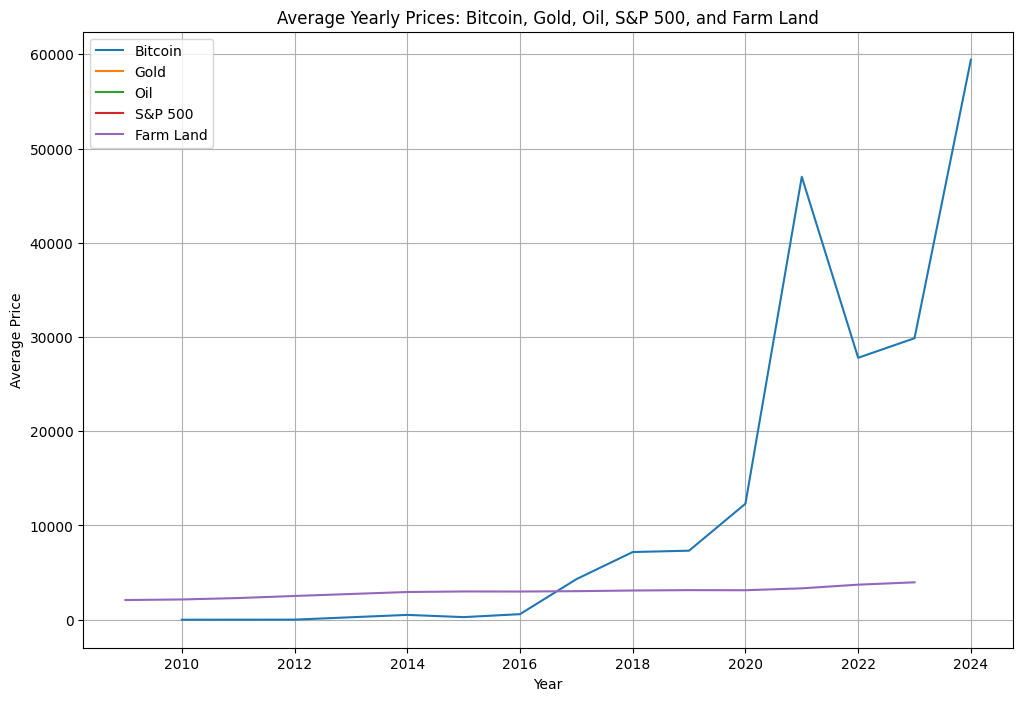

In [40]:
import matplotlib.pyplot as plt

# Assuming the DataFrames are already loaded and structured correctly
# Sample DataFrame names and columns might need adjusting based on your actual data structure

plt.figure(figsize=(12, 8))  # Increase figure size for better readability

# Plot each DataFrame using line plots
plt.plot(bitcoin_df_averaged_by_year['Year'], bitcoin_df_averaged_by_year['Average_Price'], label='Bitcoin')
plt.plot(gold_df_new['Year'], gold_df_new['Average_Closing_Price'], label='Gold')
plt.plot(oil_df_new['Year'], oil_df_new['Average_Closing_Price'], label='Oil')
plt.plot(etf_df_new['Year'], etf_df_new['Average_Closing_Price'], label='S&P 500')
plt.plot(land_df['Year'], land_df['Dollars_Per_Acre'], label='Farm Land')

# Setting the range of the x-axis to start from 2000
# plt.xlim(2000, max(etf_df['Year'].max(), land_df['Year'].max(), bitcoin_df_averaged_by_year['Year'].max()))

# Adding title and labels
plt.title('Average Yearly Prices: Bitcoin, Gold, Oil, S&P 500, and Farm Land')
plt.xlabel('Year')
plt.ylabel('Average Price')

# Automatically adjust x-ticks to fit the range of years
# plt.xticks(range(2000, int(max(etf_df['Year'].max(), land_df['Year'].max(), bitcoin_df_averaged_by_year['Year'].max())) + 1, 2))

plt.legend()  # Show legend to identify each line
plt.grid(True)  # Enable grid for better readability

# Show the plot
plt.show()


In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming each DataFrame has been filtered to start at 2009 or later and has the same structure as before
# Ensure the 'Year' column is correctly typed as integers if you're using year comparison
# Here's how you might adjust the DataFrame for starting calculations from 2010
def calculate_investment_value(df, start_year=2010, initial_investment=1000, val=0):
    # Filter to start from the given year
    df = df[df['Year'] >= start_year]
    # Get the initial price in the starting year
    if val == 0:
        initial_price = df[df['Year'] == start_year]['Average_Closing_Price'].iloc[0]
        amount_of_asset = initial_investment / initial_price
        df['Investment_Value'] = df['Average_Closing_Price'] * amount_of_asset
    elif val == 1:
        initial_price = df[df['Year'] == start_year]['Dollars_Per_Acre'].iloc[0]
        amount_of_asset = initial_investment / initial_price
        df['Investment_Value'] = df['Dollars_Per_Acre'] * amount_of_asset
    else:
        initial_price = df[df['Year'] == start_year]['Average_Price'].iloc[0]
        amount_of_asset = initial_investment / initial_price
        df['Investment_Value'] = df['Average_Price'] * amount_of_asset

    return df

# Apply the function to each asset DataFrame
bitcoin_investment = calculate_investment_value(bitcoin_df_averaged_by_year, 2010, 2)
gold_investment = calculate_investment_value(gold_df, 2010, 0)
oil_investment = calculate_investment_value(oil_df, 2010, 0)
etf_investment = calculate_investment_value(etf_df, 2010, 0)
land_investment = calculate_investment_value(land_df, 2010, 1)

# Plotting each investment over time
plt.figure(figsize=(12, 8))
plt.plot(bitcoin_investment['Year'], bitcoin_investment['Investment_Value'], label='Bitcoin')
plt.plot(gold_investment['Year'], gold_investment['Investment_Value'], label='Gold')
plt.plot(oil_investment['Year'], oil_investment['Investment_Value'], label='Oil')
plt.plot(etf_investment['Year'], etf_investment['Investment_Value'], label='ETF')
plt.plot(land_investment['Year'], land_investment['Investment_Value'], label='Farm Land')

plt.title('Value of $1,000 Investment Over Time')
plt.xlabel('Year')
plt.ylabel('Value of Investment ($)')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'Average_Closing_Price'

## Part 3: Hypothesis Testing and Machine Learning To Provide Analysis

## Part 4: Message Curation